<a href="https://colab.research.google.com/github/mike-jansen/misinformation-analysis-capstone/blob/main/politics_language_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
import json

Mounted at /content/drive


The preprocessing cells must only be run to extract the zip files and preprocess the JSON data. The output is fed into the LIWC tool, which should have it's own CSV already processed and ready to use after the preprocessing steps

#Preprocessing
Only need to run once (if you don't have the LIWC files)

###Election Subset

In [ ]:
# unzip the elections dataset
!tar -xf '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/nela-elections.tar.bz2'
dir = '/content/nela-elections-2020/newsdata'

In [ ]:
# create empty dataframe
elections_df = pd.DataFrame()

for filename in os.listdir(dir):
    if filename.endswith('.json'):
        with open(os.path.join(dir, filename)) as f:
            data = json.load(f)
            df = pd.json_normalize(data)
            elections_df = pd.concat([elections_df, df])
            #print(f"Processed {filename}")
print("Done processing")

In [ ]:
# filter unwanted columns
elections_df = elections_df.loc[:, ['source', 'title', 'content']]
print(elections_df.columns)

In [ ]:
# export the CSV for the LIWC tool
output_dir = '/content/drive/MyDrive/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

elections_df.to_csv(os.path.join(output_dir, 'nela-elections.csv'), index=False)

### Covid Subset

In [ ]:
# unzip the covid dataset
!tar -xf '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/nela-covid.tar.bz2'
dir = '/content/nela-covid-2020/newsdata'

In [ ]:
# create empty dataframe
covid_df = pd.DataFrame()

for filename in os.listdir(dir):
    if filename.endswith('.json'):
        with open(os.path.join(dir, filename)) as f:
            data = json.load(f)
            df = pd.json_normalize(data)
            covid_df = pd.concat([covid_df, df])
            #print(f"Processed {filename}")
print("Done processing")

In [ ]:
# filter unwanted columns
covid_df = covid_df.loc[:, ['source', 'title', 'content']]
print(covid_df.columns)

In [ ]:
# export the CSV for the LIWC tool
output_dir = '/content/drive/MyDrive/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

covid_df.to_csv(os.path.join(output_dir, 'nela-covid.csv'), index=False)

#LIWC Analysis

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/'
elections_df = pd.read_csv(path + 'LIWC-22 Results - nela-elections - LIWC Analysis.csv')  # elections LIWC file
covid_df = pd.read_csv(path + 'LIWC-22 Results - nela-covid - LIWC Analysis.csv')  # covid LIWC file

# load the file with truth labels
labels_file = '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/labels.csv'
labels_df = pd.read_csv(labels_file)

In [ ]:
elections_merged = elections_df.merge(labels_df, on='source')
elections_label_0 = elections_merged[elections_merged['label'] == 0]
elections_label_1 = elections_merged[elections_merged['label'] == 1]

In [ ]:
covid_merged = covid_df.merge(labels_df, on='source')
covid_label_0 = covid_merged[covid_merged['label'] == 0]
covid_label_1 = covid_merged[covid_merged['label'] == 1]

In [ ]:
# filtering out unwanted columns for each dataframe
elections_label_0 = elections_label_0.loc[:, ['title', 'content', 'Analytic', 'Authentic', 'BigWords', 'ppron']]
elections_label_1 = elections_label_1.loc[:, ['title', 'content', 'Analytic', 'Authentic', 'BigWords', 'ppron']]
covid_label_0 = covid_label_0.loc[:, ['title', 'content', 'Analytic', 'Authentic', 'BigWords', 'ppron']]
covid_label_1 = covid_label_1.loc[:, ['title', 'content', 'Analytic', 'Authentic', 'BigWords', 'ppron']]

In [ ]:
print(elections_label_0.shape)
print(elections_label_1.shape)
print(covid_label_0.shape)
print(covid_label_1.shape)

(87145, 6)
(44932, 6)
(218086, 6)
(91566, 6)


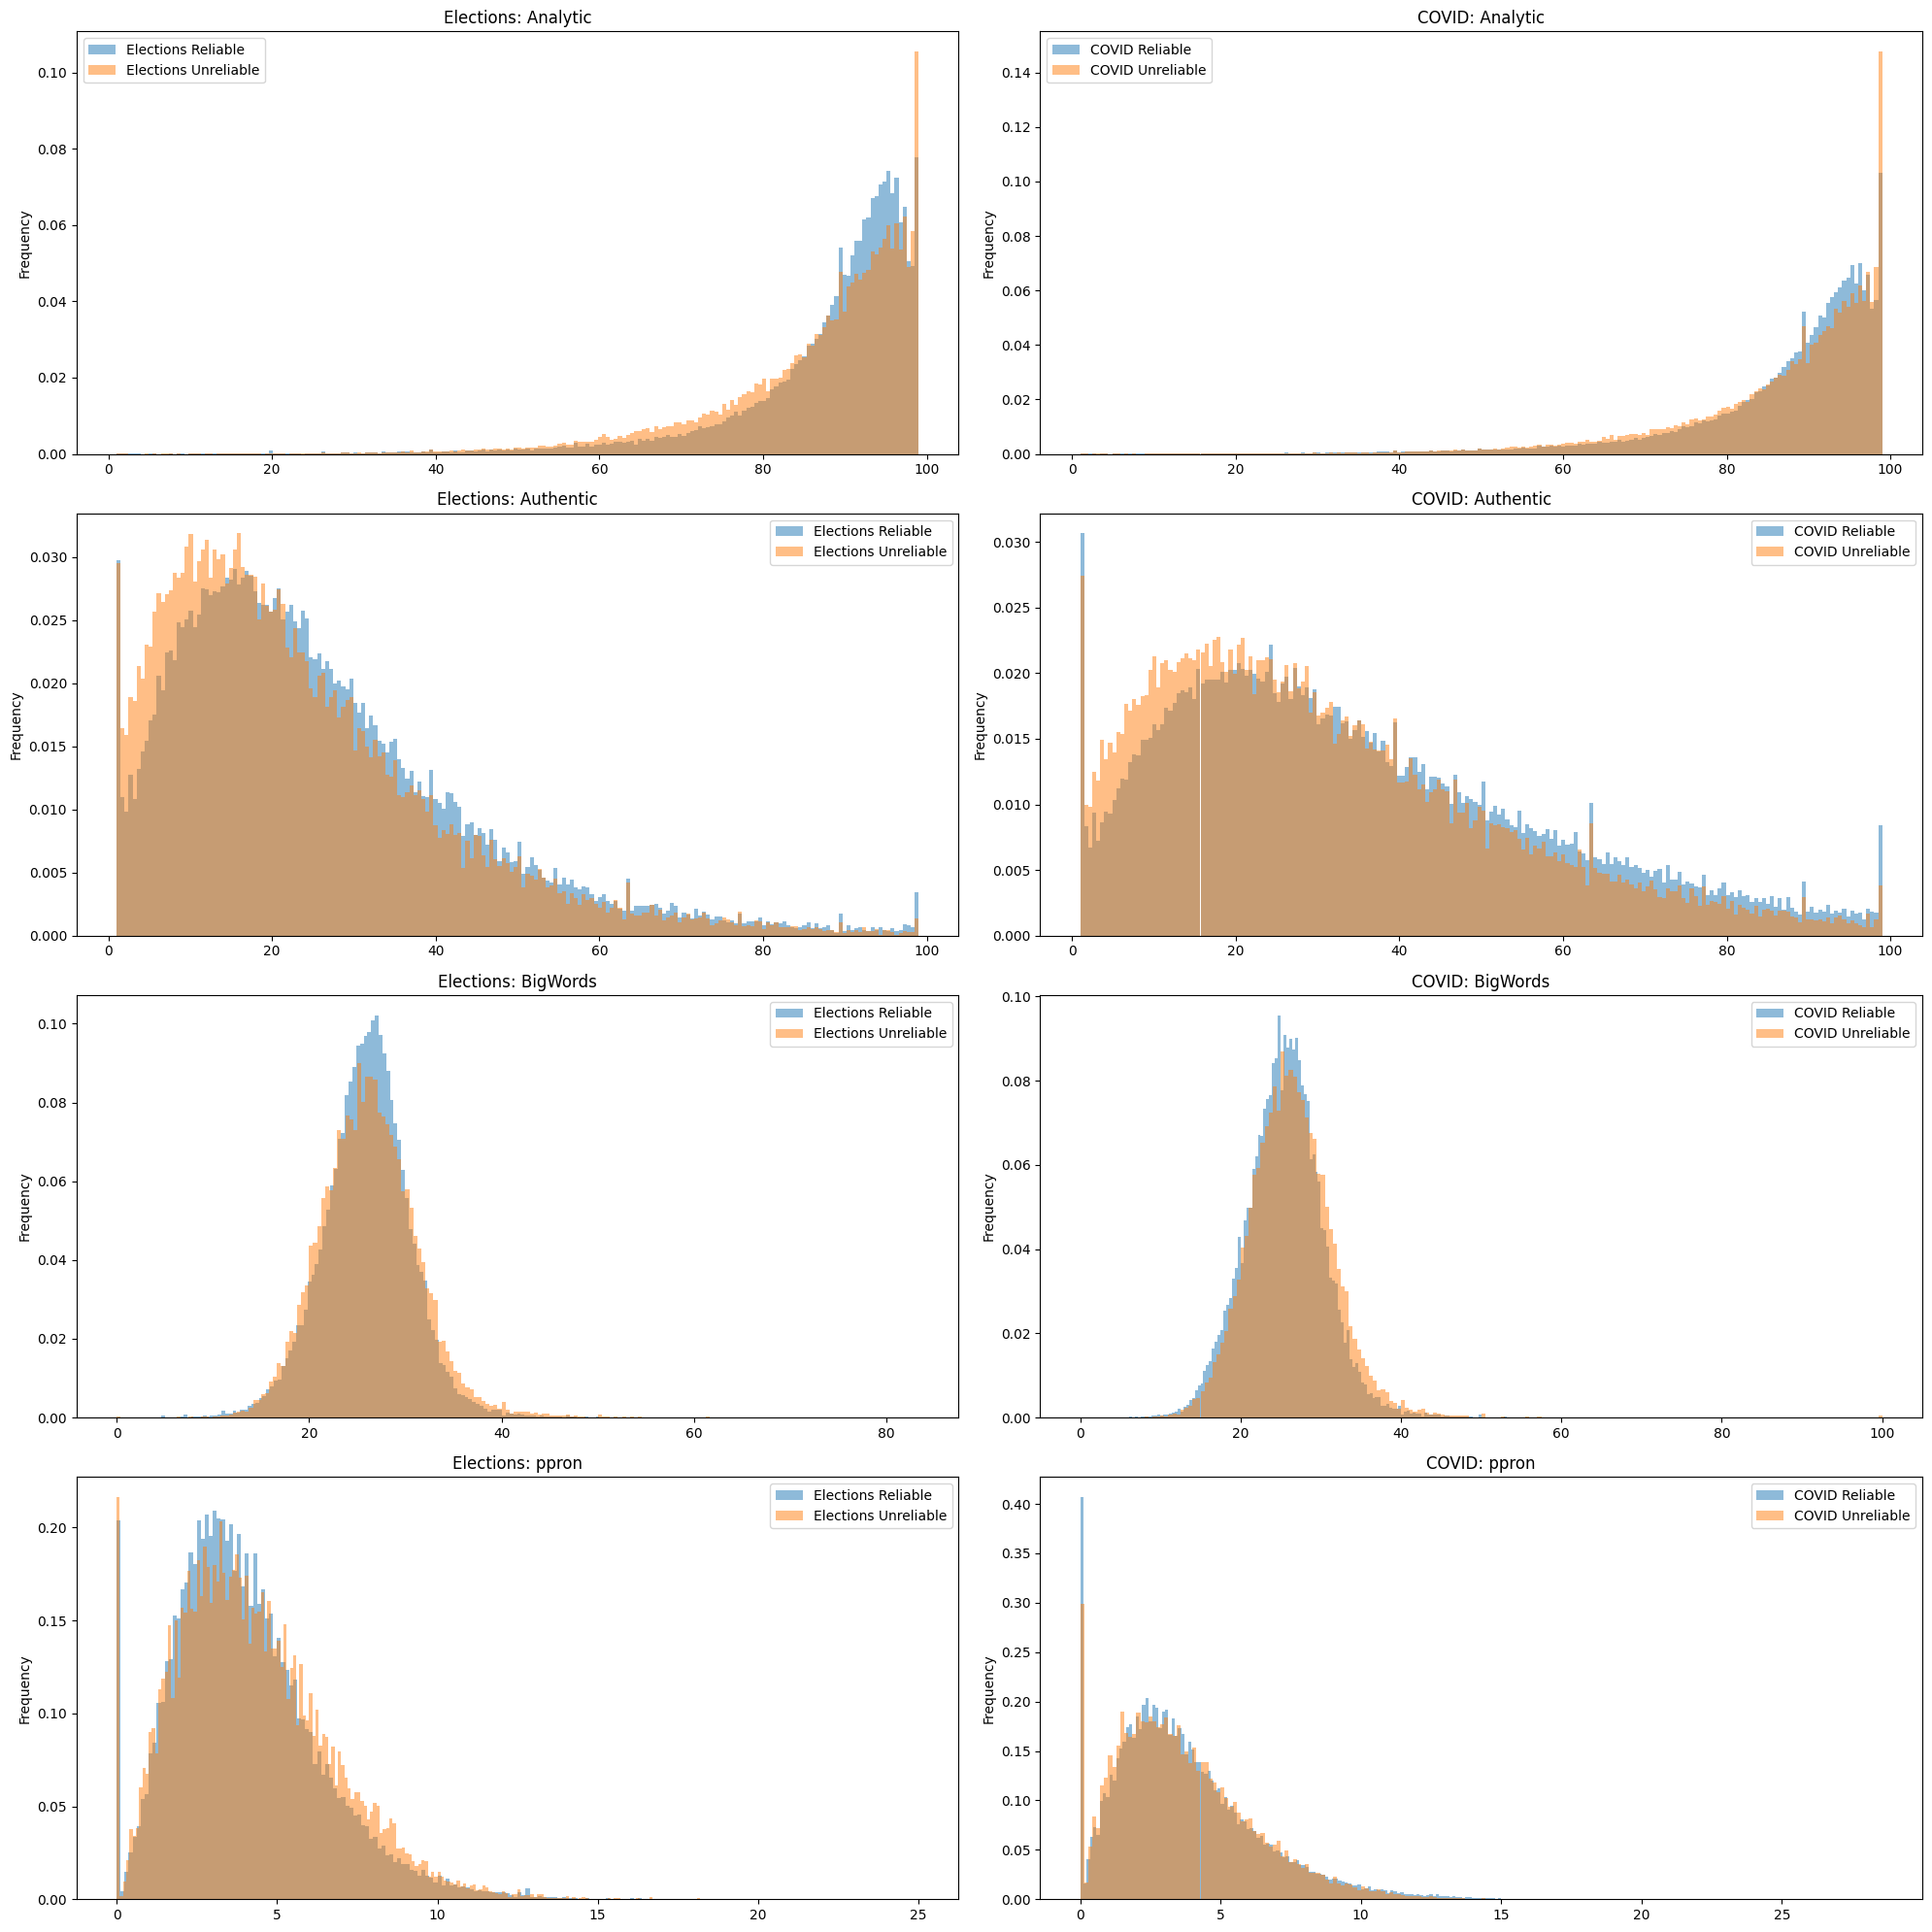

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Iterate over columns and create subplots
for i, column in enumerate(['Analytic', 'Authentic', 'BigWords', 'ppron']):
    # Plot for elections
    ax = axes[i, 0]
    elections_label_0[column].plot(kind='hist', ax=ax, alpha=0.5, label='Elections Reliable', bins=200, density=True)
    elections_label_1[column].plot(kind='hist', ax=ax, alpha=0.5, label='Elections Unreliable', bins=200, density=True)
    ax.set_title(f'Elections: {column}')
    ax.legend()

    # Plot for covid
    ax = axes[i, 1]
    covid_label_0[column].plot(kind='hist', ax=ax, alpha=0.5, label='COVID Reliable', bins=200, density=True)
    covid_label_1[column].plot(kind='hist', ax=ax, alpha=0.5, label='COVID Unreliable', bins=200, density=True)
    ax.set_title(f'COVID: {column}')
    ax.legend()

# Adjust subplot spacing
fig.tight_layout()

# Show the plots
plt.show()


# LIAR vs NELA-GT (politics)

### LIWC Comparsion

In [ ]:
# "renaming" nela dataframes
nela_true = elections_label_0
nela_false = elections_label_1

# setting up liar dataframes
liar_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/research/liar_dataset/LIWC-22 Results - liar - LIWC Analysis.csv')
liar_df = liar_df.rename(columns={liar_df.columns[2]: 'text'}).reset_index(drop=True)
liar_df = liar_df.rename(columns={liar_df.columns[1]: 'label'}).reset_index(drop=True)
liar_df = liar_df.loc[:, ['text', 'label', 'Analytic', 'Authentic', 'BigWords', 'ppron']]
# splitting liar data into true and false
liar_true = liar_df[liar_df['label'] == 'true']
liar_false = liar_df[liar_df['label'] == 'false']

In [ ]:
print(nela_true.shape)
print(nela_false.shape)
print(liar_true.shape)
print(liar_false.shape)

(87145, 6)
(44932, 6)
(1676, 6)
(1994, 6)


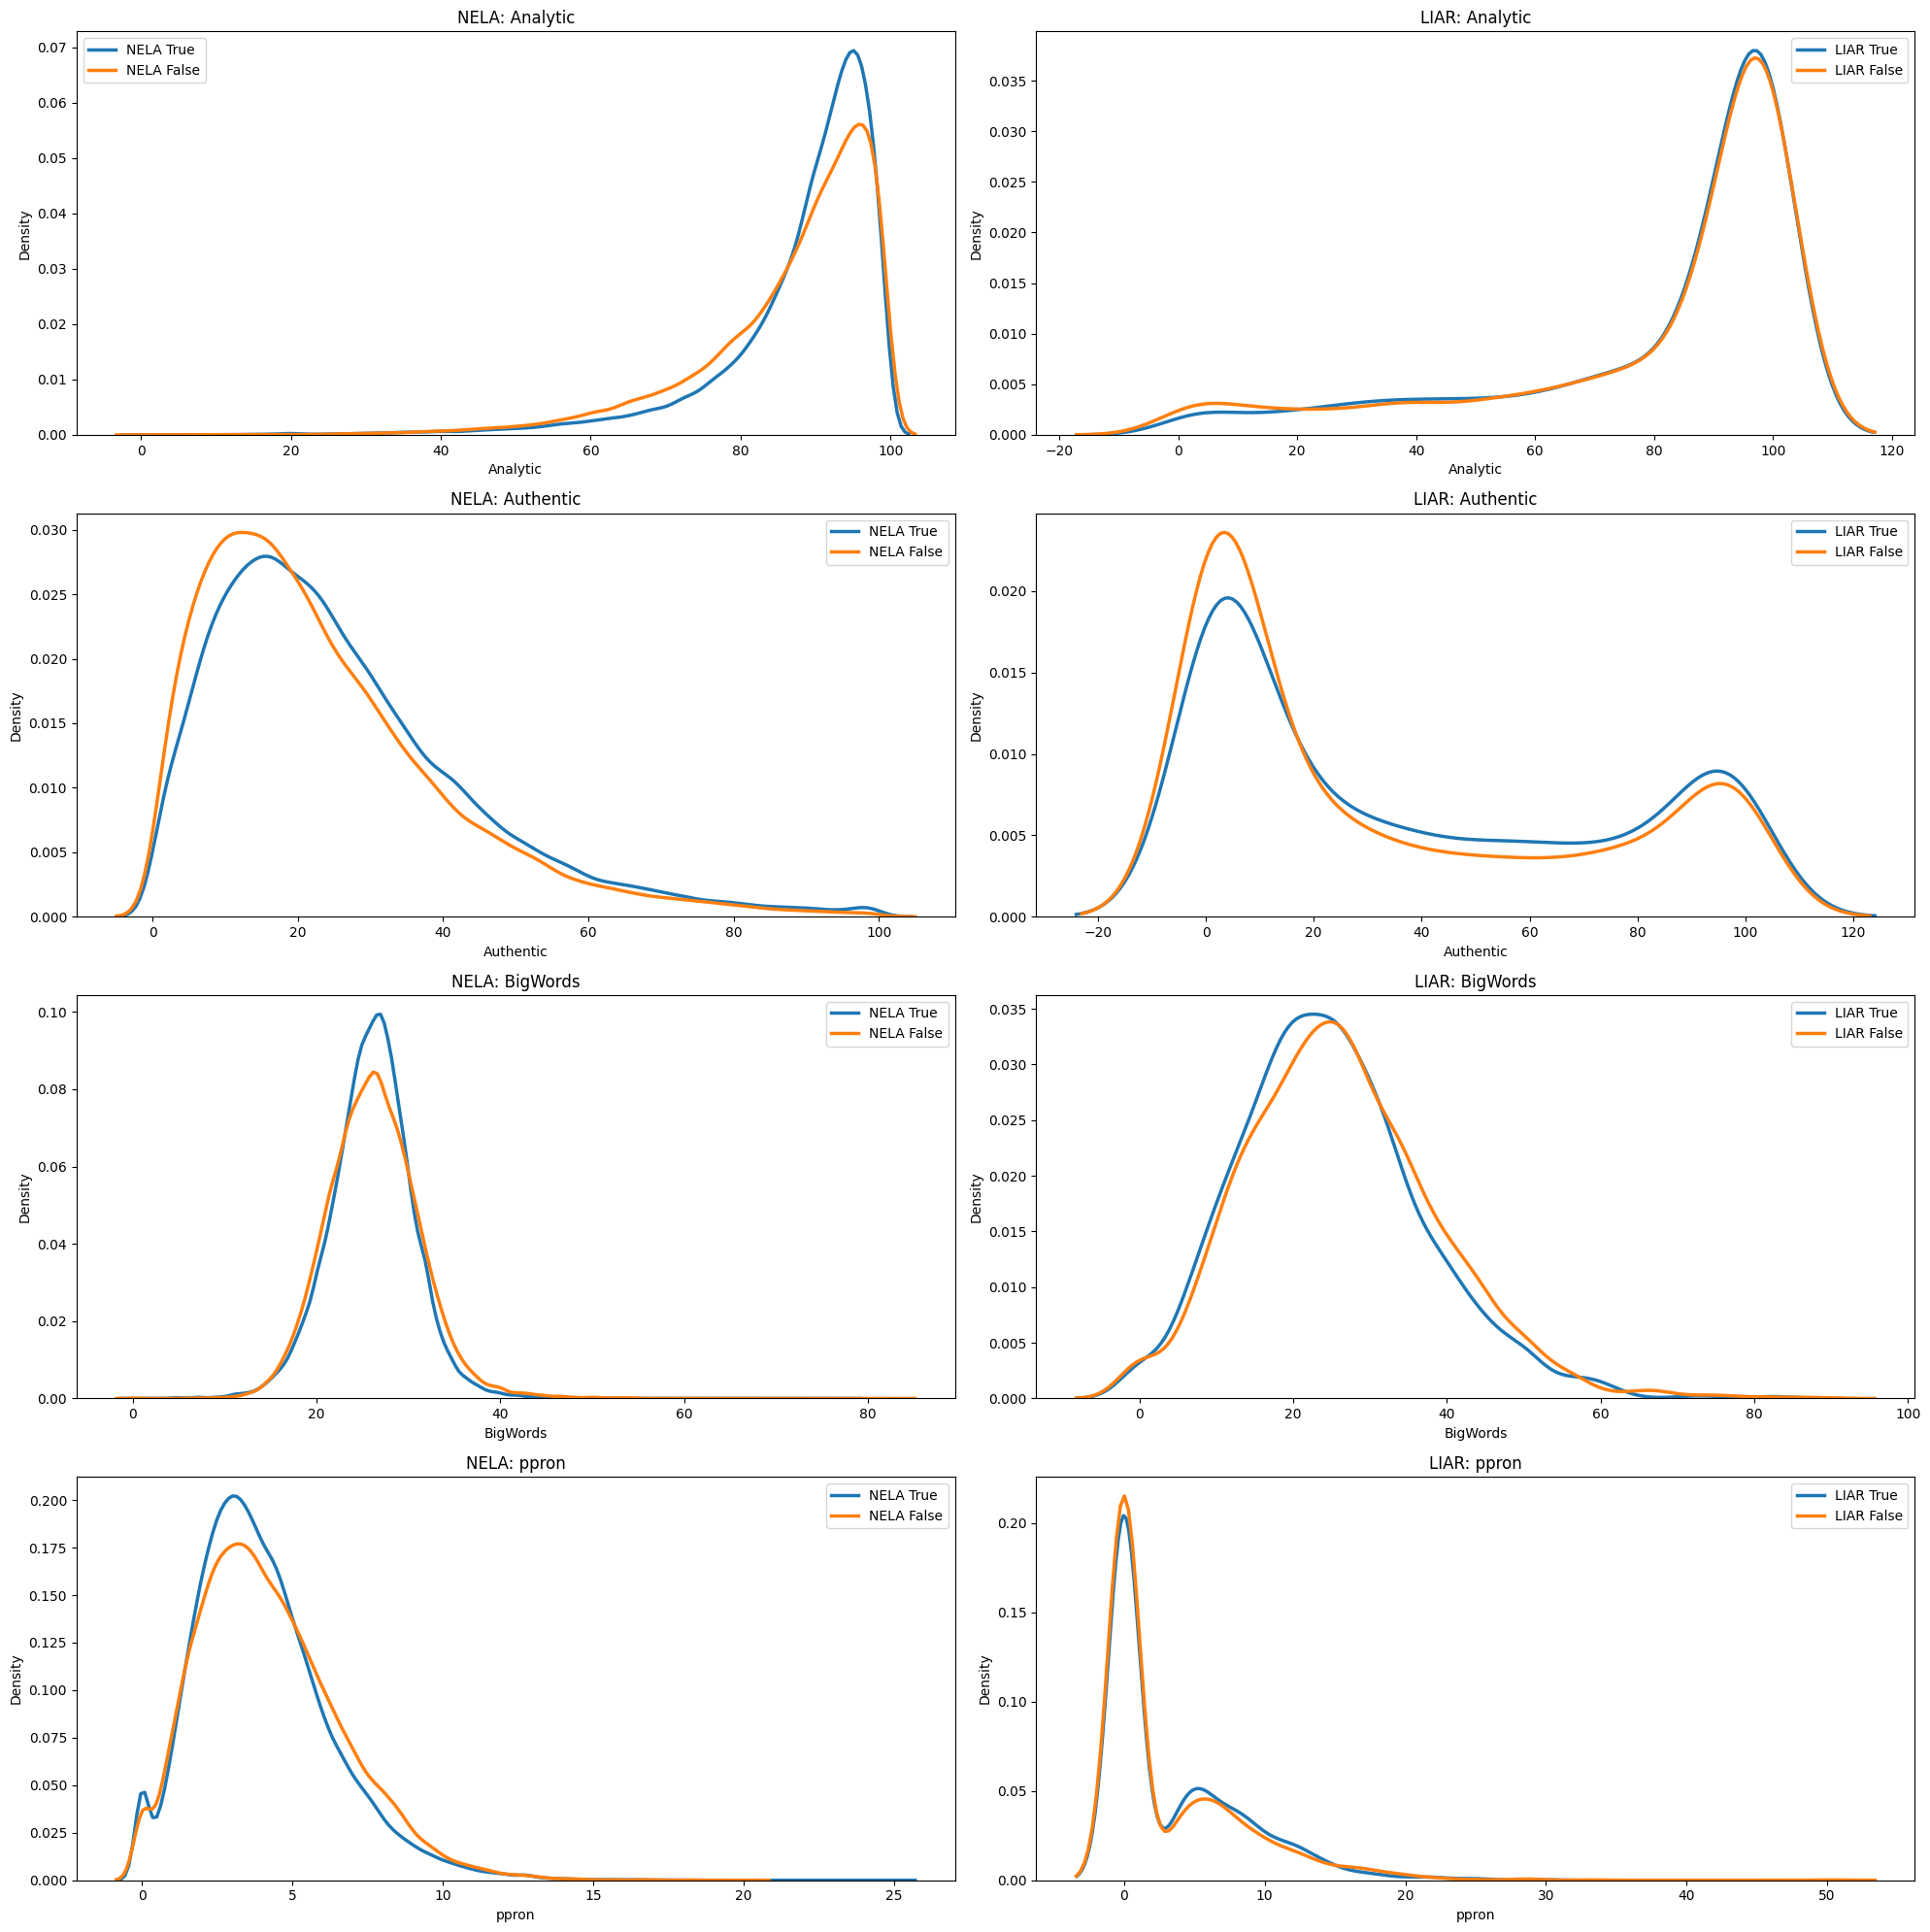

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Iterate over columns and create subplots
for i, column in enumerate(['Analytic', 'Authentic', 'BigWords', 'ppron']):
    # Plot for nela
    ax = axes[i, 0]
    sns.kdeplot(nela_true[column], ax=ax, label='NELA True', linewidth=2.5)
    sns.kdeplot(nela_false[column], ax=ax, label='NELA False', linewidth=2.5)
    ax.set_title(f'NELA: {column}')
    ax.legend()

    # Plot for liar
    ax = axes[i, 1]
    sns.kdeplot(liar_true[column], ax=ax, label='LIAR True', linewidth=2.5)
    sns.kdeplot(liar_false[column], ax=ax, label='LIAR False', linewidth=2.5)
    ax.set_title(f'LIAR: {column}')
    ax.legend()

# Adjust subplot spacing
fig.tight_layout()

# Show the plots
plt.show()


### NRCLex Comparison

In [ ]:
!pip install NRCLex
from nrclex import NRCLex
# import the punkt tokenizer for NRCLex to work
import nltk
nltk.download('punkt')
from collections import defaultdict
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=588ce833fdc76144e83654372694d0a1ffb6d0d82aefbb68f31298f1f0dcf31e
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nela_true_text = nela_true['content']
nela_false_text = nela_false['content']
liar_true_text = liar_true['text']
liar_false_text = liar_false['text']

In [ ]:
from collections import defaultdict
from nrclex import NRCLex

# Create dictionaries to store emotion counts and raw scores for each dataframe
nela_true_emotions_count = defaultdict(int)
nela_true_raw_count = defaultdict(int)
nela_false_emotions_count = defaultdict(int)
nela_false_raw_count = defaultdict(int)
liar_true_emotions_count = defaultdict(int)
liar_true_raw_count = defaultdict(int)
liar_false_emotions_count = defaultdict(int)
liar_false_raw_count = defaultdict(int)

# create tuples for each category so its easier to iterate
dataframes = [
    (nela_true_text, nela_true_emotions_count, nela_true_raw_count),
    (nela_false_text, nela_false_emotions_count, nela_false_raw_count),
    (liar_true_text, liar_true_emotions_count, liar_true_raw_count),
    (liar_false_text, liar_false_emotions_count, liar_false_raw_count)
]

# loop over each category
for text, emotions_count, raw_count in dataframes:
    for sentence in text[0:10000]:
        if isinstance(sentence, str): # check if the text is a string
            lexicon = NRCLex(sentence)
            top_emotions = lexicon.top_emotions
            raw_scores = lexicon.raw_emotion_scores
            # emotions count
            for emotion, score in top_emotions:
                emotions_count[emotion] += score
            # raw count
            for emotion, score in raw_scores.items():
                raw_count[emotion] += score

In [ ]:
# sort the dictionaries based on count (for better visualization)
sorted_nela_true_emotions_count = dict(sorted(nela_true_emotions_count.items(), key=lambda x: x[1], reverse=True))
sorted_nela_false_emotions_count = dict(sorted(nela_false_emotions_count.items(), key=lambda x: x[1], reverse=True))
sorted_liar_true_emotions_count = dict(sorted(liar_true_emotions_count.items(), key=lambda x: x[1], reverse=True))
sorted_liar_false_emotions_count = dict(sorted(liar_false_emotions_count.items(), key=lambda x: x[1], reverse=True))

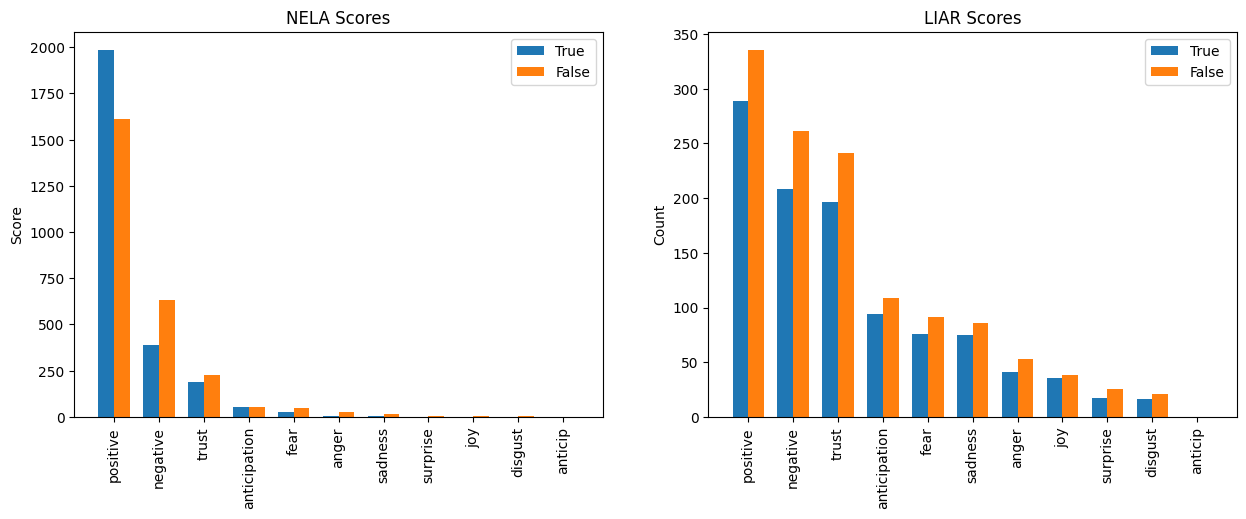

In [ ]:
import numpy as np

# Plotting the output
import matplotlib.pyplot as plt

# Extract emotion categories and scores as separate lists for the first metric
categories1 = list(sorted_nela_true_emotions_count.keys())
scores1_true = list(sorted_nela_true_emotions_count.values())
scores1_false = list(sorted_nela_false_emotions_count.values())

# Extract categories and raw counts as separate lists for the second metric
categories2 = list(sorted_liar_true_emotions_count.keys())
scores2_true = list(sorted_liar_true_emotions_count.values())
scores2_false = list(sorted_liar_false_emotions_count.values())

# Define the width of each bar
bar_width = 0.35

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Compute the position for each category
x_pos1 = np.arange(len(categories1))
x_pos2 = np.arange(len(categories2))

# Plot the first graph on the left subplot
axs[0].bar(x_pos1, scores1_true, width=bar_width, label='True')
axs[0].bar(x_pos1 + bar_width, scores1_false, width=bar_width, label='False')
axs[0].set_ylabel('Score')
axs[0].set_title('NELA Scores')
axs[0].set_xticks(x_pos1 + bar_width / 2)
axs[0].set_xticklabels(categories1, rotation=90)
axs[0].legend()

# Plot the second graph on the right subplot
axs[1].bar(x_pos2, scores2_true, width=bar_width, label='True')
axs[1].bar(x_pos2 + bar_width, scores2_false, width=bar_width, label='False')
axs[1].set_ylabel('Count')
axs[1].set_title('LIAR Scores')
axs[1].set_xticks(x_pos2 + bar_width / 2)
axs[1].set_xticklabels(categories2, rotation=90)
axs[1].legend()

# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

#Exporting data

In [ ]:
# output_directory = '/content/drive/MyDrive/output/'
# nela_true.to_csv(output_directory + 'nela_true.csv', index=False)
# nela_false.to_csv(output_directory + 'nela_false.csv', index=False)
# liar_true.to_csv(output_directory + 'liar_true.csv', index=False)
# liar_false.to_csv(output_directory + 'liar_false.csv', index=False)